In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cancer_data = pd.read_csv("breast_cancer.csv")

In [3]:
cancer_data

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,0,1000025,5,1,1,1,2,1,3,1,1,0
1,1,1002945,5,4,4,5,7,10,3,2,1,0
2,2,1015425,3,1,1,1,2,2,3,1,1,0
3,3,1016277,6,8,8,1,3,4,3,7,1,0
4,4,1017023,4,1,1,3,2,1,3,1,1,0
5,5,1017122,8,10,10,8,7,10,9,7,1,1
6,6,1018099,1,1,1,1,2,10,3,1,1,0
7,7,1018561,2,1,2,1,2,1,3,1,1,0
8,8,1033078,2,1,1,1,2,1,1,1,5,0
9,9,1033078,4,2,1,1,2,1,2,1,1,0


In [4]:
cancer_data = cancer_data.drop(['Unnamed: 0', 'id number'], axis = 1)

In [5]:
cancer_data

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


In [6]:
y = cancer_data.pop('malignant')

In [7]:
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(cancer_data, y, test_size = .2)

In [8]:
## grid search to optimize model hyperparamters.
n_estimators = [300, 400, 500]
max_features = ['auto', 'sqrt', 'log2']
min_samples_split = [3,5,7]

rfc = RandomForestClassifier(n_jobs=1)
estimator = GridSearchCV(rfc,
                        dict(n_estimators=n_estimators,
                            max_features=max_features,
                            min_samples_split=min_samples_split),
                         cv =None, n_jobs=-1)

In [9]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'n_estimators': [300, 400, 500], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [10]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
best_rfc = estimator.best_estimator_

In [12]:
## AUC
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print("AUC: ", roc)

AUC:  0.972310293807


In [13]:
## Accuracy
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print("Accuracy: ", accuracy)

Accuracy:  0.914285714286


In [14]:
## Precision/Recall
print (classification_report(y_test, best_rfc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.93      0.93      0.93        83
          1       0.89      0.89      0.89        57

avg / total       0.91      0.91      0.91       140



### 1. K Fold

In [15]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, cancer_data, y, cv=10)
print("scores: ", scores)

scores:  [ 0.91549296  0.97142857  0.97142857  0.91428571  0.98571429  0.98571429
  0.98571429  0.98571429  0.98550725  1.        ]


In [16]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci = 2.626 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print ("Score is %f +/-  %f" % (mean_score, ci))
print ('95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound))

Score is 0.970100 +/-  0.023790
95 percent probability that if this experiment were repeated over and over the average score would be between 0.946310 and 0.993890


### 2. 

The K-Fold Cross Validation had a slightly lower AUC than my single hold out. K-Fold had an AUC of .970100 with a conifidence interval of +/- .023790, while my single hold out had an AUC score of .9723102. So, it appears single hold out using Grid search to optimize the hyperparameters helps get out a better AUC.

### 3.

My model's performance seems ok. It has a pretty high AUC overall of .9723102. The higest possible AUC is 1. But, it's accuracy and precision/recall were lower than the AUC. As far as precision, my model will correctly identify 89% of the tumors as malignant, while there's a 11% chance it will identify a malignant tumor as benign. As far as recall goes, of the number of malignant tumors my model identified, 89% of them would actually be malignant. 

The Precision/Recall numbers don't seem very good at determining malignant tumors and I believe my model should be tweaked to try to better these scores if they would be used in the real world.


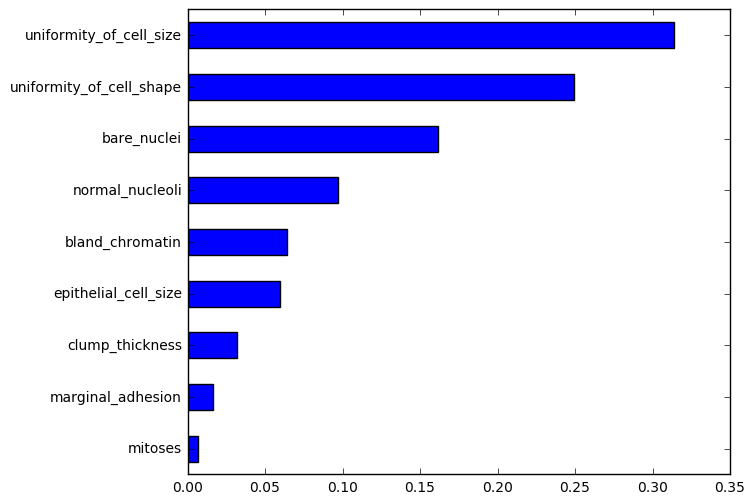

In [21]:
## let's look at what variables are important, just for kicks
feature_importances = pd.Series(best_rfc.feature_importances_, index=cancer_data.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(7,6))